https://www.perplexity.ai/search/19ae60c3-b5ed-492c-be69-10220f74dc80

In [2]:
import yfinance as yf
tw2330 = yf.download('2330.TW',start='2024-01-01',end='2024-06-01',auto_adjust=True)
tw2303 = yf.download('2303.TW',start='2024-01-01',end='2024-06-01',auto_adjust=True)
tw2454 = yf.download('2454.TW',start='2024-01-01',end='2024-06-01',auto_adjust=True)
tw2317 = yf.download('2317.TW',start='2024-01-01',end='2024-06-01',auto_adjust=True)
tw2317

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,2317.TW,2317.TW,2317.TW,2317.TW,2317.TW
Date,,,,,
2024-01-02,102.375000,102.375000,101.400000,101.887500,19921105
2024-01-03,101.887505,102.375005,101.400005,101.887505,18957682
2024-01-04,101.400002,102.375002,101.400002,101.887502,15488559
2024-01-05,101.400002,101.887502,101.400002,101.400002,13349572
2024-01-08,98.962502,101.400002,98.962502,100.912502,34642006
...,...,...,...,...,...
2024-05-27,180.375000,180.375000,174.037500,174.525000,113997157
2024-05-28,180.862503,181.350003,178.912503,180.862503,67804130


In [5]:
tw2330[('Close','2330.TW')]

Date
2024-01-02    593.0
2024-01-03    578.0
2024-01-04    580.0
2024-01-05    576.0
2024-01-08    583.0
              ...  
2024-05-27    869.0
2024-05-28    865.0
2024-05-29    857.0
2024-05-30    838.0
2024-05-31    821.0
Name: (Close, 2330.TW), Length: 98, dtype: float64

In [6]:
tw2330_s = tw2330[('Close','2330.TW')]
tw2303_s = tw2303[('Close','2303.TW')]
tw2454_s = tw2454[('Close','2454.TW')]
tw2317_s = tw2317[('Close','2317.TW')]

In [23]:
import pandas as pd
df_price = pd.DataFrame({"台積電":tw2330_s,"聯電":tw2303_s,"聯發科":tw2454_s,"鴻海":tw2317_s})
df_price

,台積電,聯電,聯發科,鴻海
Date,,,,
2024-01-02,593.0,51.900002,915.833130,102.375000
2024-01-03,578.0,50.599998,889.693176,101.887505
2024-01-04,580.0,50.799999,889.309875,101.400002
2024-01-05,576.0,50.799999,882.601685,101.400002
2024-01-08,583.0,50.500000,881.643372,98.962502
...,...,...,...,...
2024-05-27,869.0,56.599998,1231.425903,180.375000
2024-05-28,865.0,56.400002,1255.383545,180.862503
2024-05-29,857.0,55.900002,1236.217407,175.987503


In [12]:
#matrix(矩陣)
#欄位和索引一樣數量,一樣的名稱
df_matrix = df_price.corr()

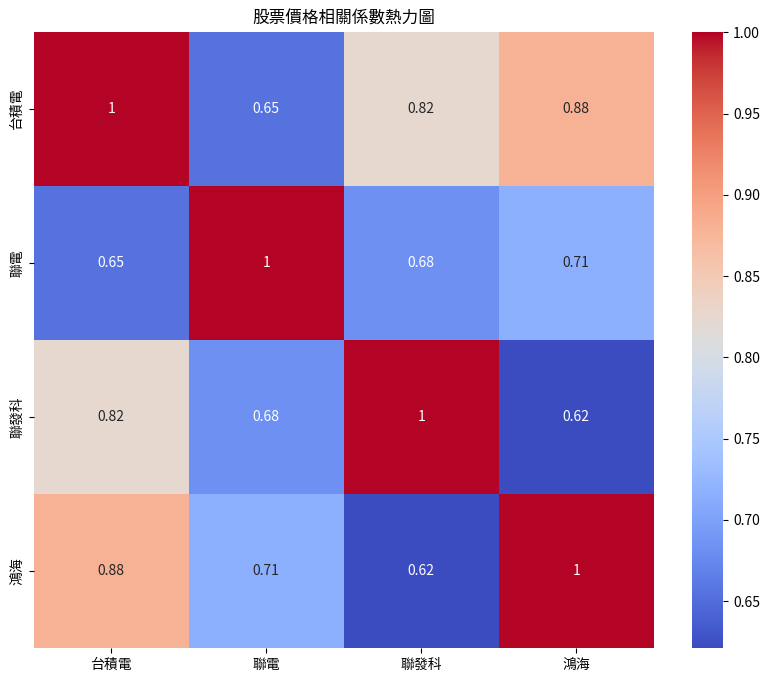

In [19]:
#矩陣
#seaborn heatmap()
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

figure = plt.figure(figsize=(10, 8))
axes = figure.add_subplot(1,1,1)
sns.heatmap(df_matrix, annot=True, cmap='coolwarm',axes=axes)
axes.set_title("股票價格相關係數熱力圖")
plt.show()
plt.close()

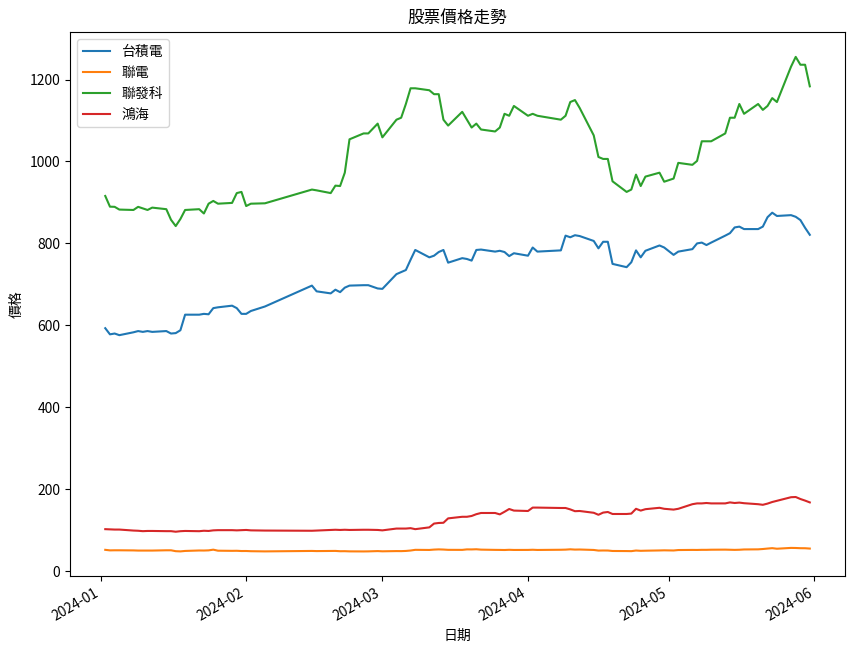

In [25]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.font_manager import fontManager

fontManager.addfont("ChineseFont.ttf")
mpl.rc('font', family="ChineseFont")

figure = plt.figure(figsize=(10, 8))
axes = figure.add_subplot(1,1,1)
df_price.plot(title='股票價格走勢', xlabel='日期', ylabel='價格',ax=axes)

plt.show()

In [26]:
df_price.diff()

,台積電,聯電,聯發科,鴻海
Date,,,,
2024-01-02,NaN,NaN,NaN,NaN
2024-01-03,-15.0,-1.300003,-26.139954,-0.487495
2024-01-04,2.0,0.200001,-0.383301,-0.487503
2024-01-05,-4.0,0.000000,-6.708191,0.000000
2024-01-08,7.0,-0.299999,-0.958313,-2.437500
...,...,...,...,...
2024-05-27,2.0,2.000000,86.247803,8.774994
2024-05-28,-4.0,-0.199997,23.957642,0.487503
2024-05-29,-8.0,-0.500000,-19.166138,-4.875000


In [28]:
percent_df = df_price.pct_change()

In [30]:
formatted = percent_df.map(lambda x: f"{x:.2%}" if pd.notnull(x) else "")
formatted

,台積電,聯電,聯發科,鴻海
Date,,,,
2024-01-02,,,,
2024-01-03,-2.53%,-2.50%,-2.85%,-0.48%
2024-01-04,0.35%,0.40%,-0.04%,-0.48%
2024-01-05,-0.69%,0.00%,-0.75%,0.00%
2024-01-08,1.22%,-0.59%,-0.11%,-2.40%
...,...,...,...,...
2024-05-27,0.23%,3.66%,7.53%,5.11%
2024-05-28,-0.46%,-0.35%,1.95%,0.27%
2024-05-29,-0.92%,-0.89%,-1.53%,-2.70%
